In [10]:
# First, we import all the packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
import matplotlib.pyplot as plt

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 14

In [12]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

In [13]:
# Data processing: 
# 1. Go through 2002-2012 and create a daily climatology and save all 365 days of the climatology
SST = ds.analysed_sst - 273.15
monthly_climatology = SST.sel(time = slice('2002', '2012')).groupby('time.month').mean()
#calculate sd of the location and month
monthly_climatology_sd = SST.sel(time = slice('2002', '2012')).groupby('time.month').std()


# 2. Go through each day of data and calculate the anomaly and save each day's anomaly
years_anomaly = []

ds_2014 = SST.sel(time = '2014')
anomaly_2014 = ds_2014.groupby('time.month').mean() - monthly_climatology
anomaly_2014 = anomaly_2014.where(abs(anomaly_2014) >= monthly_climatology_sd, 0)
years_anomaly.append(anomaly_2014)

ds_2015 = SST.sel(time = '2015')
anomaly_2015 = ds_2015.groupby('time.month').mean() - monthly_climatology
anomaly_2015 = anomaly_2015.where(abs(anomaly_2015) >= monthly_climatology_sd, 0)
years_anomaly.append(anomaly_2015)

ds_2016 = SST.sel(time = '2016')
anomaly_2016 = ds_2016.groupby('time.month').mean() - monthly_climatology
anomaly_2016 = anomaly_2016.where(abs(anomaly_2016) >= monthly_climatology_sd, 0)
years_anomaly.append(anomaly_2016)

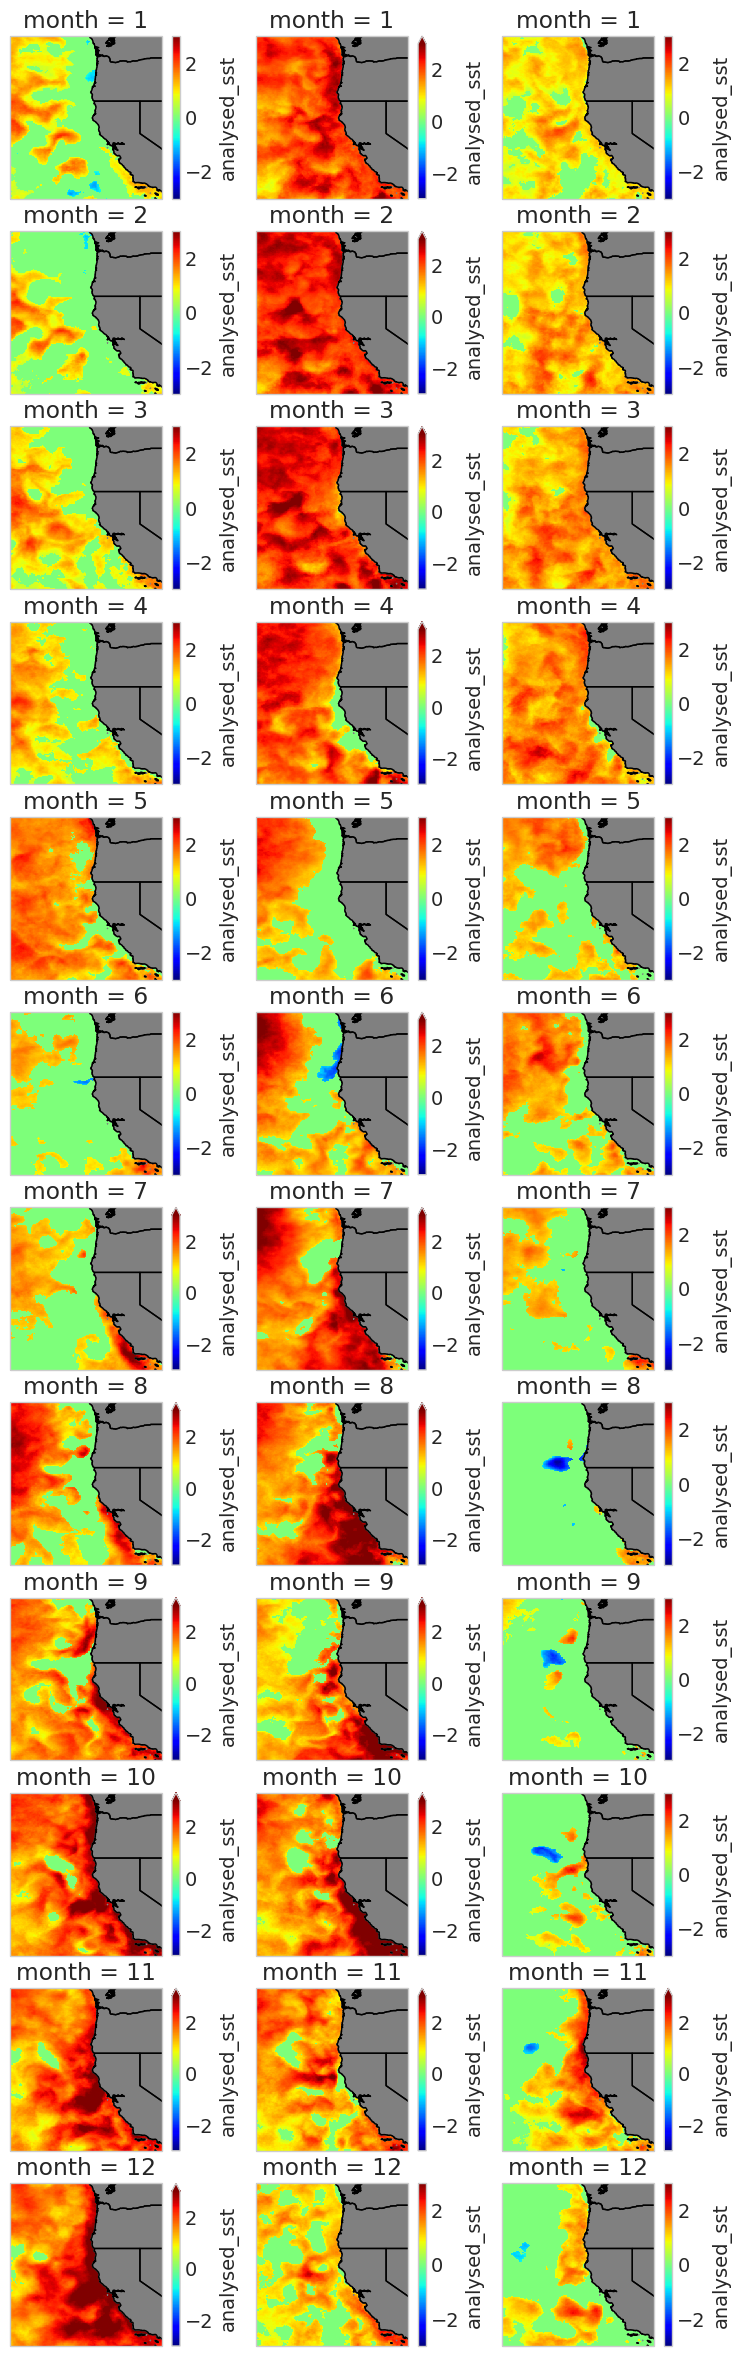

In [37]:
#calculate SST anomolies

# An array for every month of the year
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# create the 12 * 3 grid for the graph.
fig, ax = plt.subplots(nrows=12, ncols=3, sharex=True, sharey=True,
                       subplot_kw=dict(projection=crs),
                            #subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(9, 30))

## Plotting Data with a nested loop
## Part of the code inside the nested loop is provided by the homework instruction notebook
for year in range(3):
    anomaly_by_year = years_anomaly[year]
    for month in range(12):
        anomaly_by_month = anomaly_by_year[month, :, :]
       
        anomaly_by_month.plot(ax=ax[month, year], transform=crs, cmap='jet', vmin=-3, vmax=3)
        
        ax[month, year].coastlines("10m", color="k", zorder=1)
        ax[month, year].add_feature(cfeature.LAND, color="grey", zorder=1)
        ax[month, year].add_feature(cfeature.STATES.with_scale("10m"), zorder=1)
